<a href="https://colab.research.google.com/github/franckbizimana/ML/blob/main/Object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection

Object detection is a computer vision task that involves identifying and localizing objects within an image or video frame.

It's a fundamental problem in computer vision with various practical applications, including autonomous vehicles, surveillance systems, robotics, medical imaging, and more.

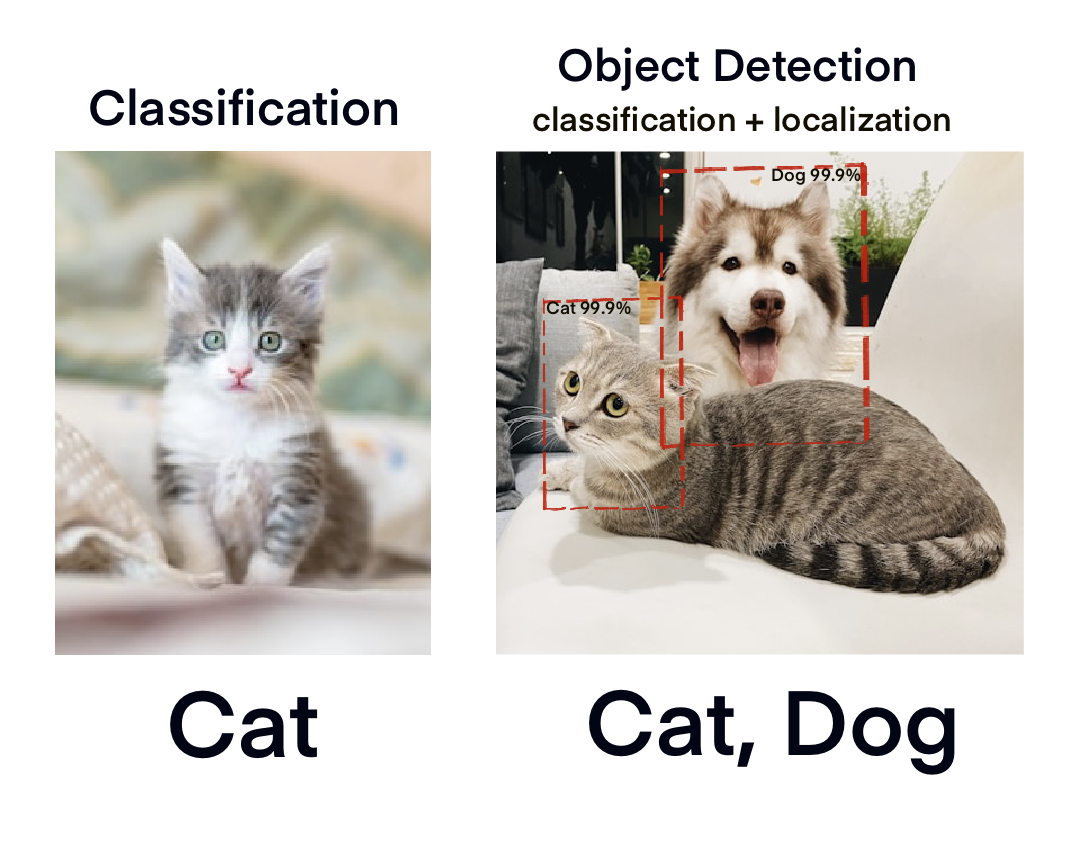

In [16]:
# import libraries
from IPython.display import Image
Image(filename='class_object.PNG')

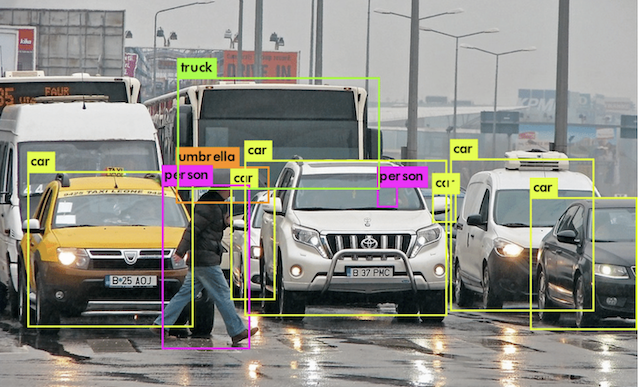

In [17]:
# Real life Example
from IPython.display import Image
Image(filename='Object_detection.png')

- To run this code on your own machine, you will need to install the following:

```
    # to load pre-trained models
    !pip install transformers

    # for creating web interfaces for machine learning models.
    !pip install gradio

    # PyTorch Image Models (timm), a collection of image models (CNN architectures) for PyTorch.
    !pip install timm

    # for generating plurals, singular nouns, ordinals, and indefinite articles.
    !pip install inflect

    # for converting text into phonetic (audio) transcriptions.
    !pip install phonemizer

    # install the eSpeak software for TTS (text-to-speech) conversion
    !sudo apt-get install python-espeak
    !sudo apt-get update && sudo apt-get install espeak

```

### Build the `object-detection` pipeline using the transformers Library

- This model was release with the paper [End-to-End Object Detection with Transformers](https://arxiv.org/abs/2005.12872) from Carion et al. (2020)

In [1]:
# use the functions from the helper file
from helper import load_image_from_url, render_results_in_image

In [2]:
# import pipeline from transformers
from transformers import pipeline

In [3]:
# code to suppress warning messages
from transformers.utils import logging
logging.set_verbosity_error()

from helper import ignore_warnings
ignore_warnings()

In [4]:
# Import the model and create an instance
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

Explore more of the [Hugging Face Hub for more object detection models](https://huggingface.co/models?pipeline_tag=object-detection&sort=trending)

### Use the Pipeline

In [5]:
# Python Image Library
from PIL import Image

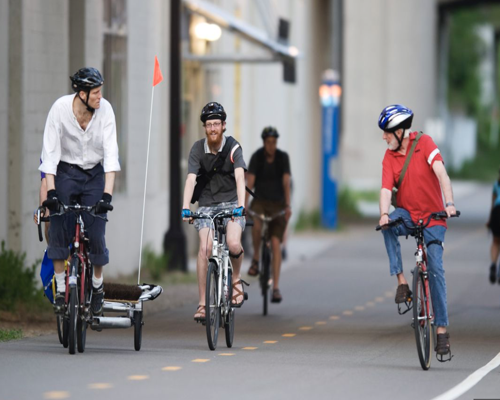

In [6]:
# Import the image
raw_image = Image.open('OD_test.png')

# Resize as pre-processing step for standardized input size
raw_image.resize((500, 400))

In [7]:
# runt the model
pipeline_output = od_pipe(raw_image)

In [8]:
# valide the results
pipeline_output

[{'score': 0.950089693069458,
  'label': 'bicycle',
  'box': {'xmin': 84, 'ymin': 358, 'xmax': 347, 'ymax': 646}},
 {'score': 0.5412725806236267,
  'label': 'backpack',
  'box': {'xmin': 426, 'ymin': 251, 'xmax': 534, 'ymax': 365}},
 {'score': 0.6332526206970215,
  'label': 'backpack',
  'box': {'xmin': 859, 'ymin': 241, 'xmax': 922, 'ymax': 377}},
 {'score': 0.9989932179450989,
  'label': 'bicycle',
  'box': {'xmin': 829, 'ymin': 381, 'xmax': 1011, 'ymax': 674}},
 {'score': 0.9268129467964172,
  'label': 'person',
  'box': {'xmin': 1067, 'ymin': 314, 'xmax': 1095, 'ymax': 520}},
 {'score': 0.9985129237174988,
  'label': 'bicycle',
  'box': {'xmin': 397, 'ymin': 370, 'xmax': 543, 'ymax': 638}},
 {'score': 0.9105724096298218,
  'label': 'handbag',
  'box': {'xmin': 860, 'ymin': 239, 'xmax': 923, 'ymax': 387}},
 {'score': 0.6811761260032654,
  'label': 'bicycle',
  'box': {'xmin': 90, 'ymin': 357, 'xmax': 216, 'ymax': 649}},
 {'score': 0.9995279312133789,
  'label': 'person',
  'box': {'

- Return the results from the pipeline using the helper function `render_results_in_image`.

In [9]:
# render the image
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

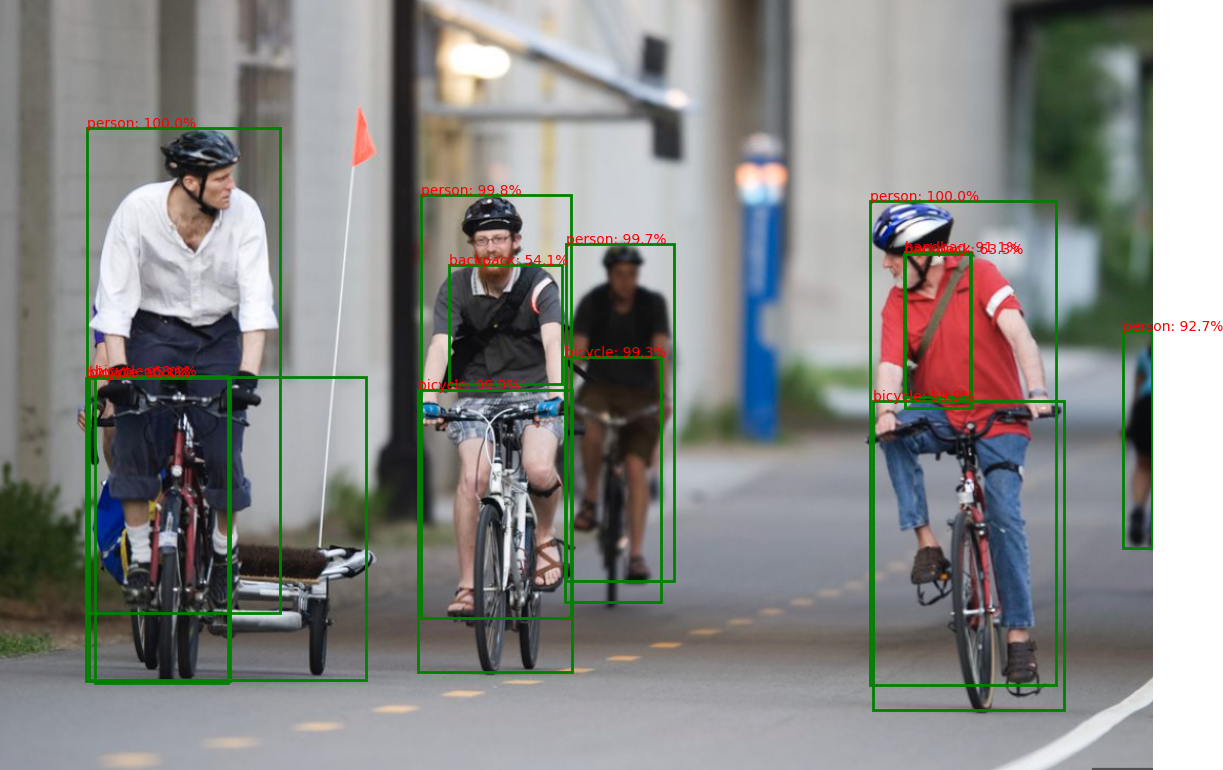

In [10]:
# view the final output
processed_image

### Using `Gradio` to create a Simple Interface

Gradio is a Python library that simplifies the process of creating web interfaces for machine learning models. It allows you to quickly build interactive web-based applications where users can interact with your machine learning models without needing to write any HTML, CSS, or JavaScript code.

Once you've imported Gradio, you can use its functions and classes to define input and output components, specify your machine learning model, and create a web interface that integrates with your model.

In [11]:
# import gradio
import gradio as gr

In [12]:
# this function will do all the steps under the hood

def get_pipeline_prediction(pil_image):

    # this will process the image and identify the objects
    pipeline_output = od_pipe(pil_image)

    # This will output the labelled image with boxes and confidence score
    processed_image = render_results_in_image(pil_image, pipeline_output)

    return processed_image

In [13]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

- `share=True` will provide an online link to access to the demo

In [14]:
# share=True will create a public link for sharing
demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ed06b4d07dfde79b5f.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


### Close the app
- Remember to call `.close()` on the Gradio app when you're done using it.

In [15]:
# close when done
demo.close()

Closing server running on port: 7860


## Audio Assistant


- Combine the object detector with a text-to-speech model that will help dictate what is inside the image.


In [16]:
# Remember, our pipeline_output has the raw output from the object detection model
pipeline_output

[{'score': 0.950089693069458,
  'label': 'bicycle',
  'box': {'xmin': 84, 'ymin': 358, 'xmax': 347, 'ymax': 646}},
 {'score': 0.5412725806236267,
  'label': 'backpack',
  'box': {'xmin': 426, 'ymin': 251, 'xmax': 534, 'ymax': 365}},
 {'score': 0.6332526206970215,
  'label': 'backpack',
  'box': {'xmin': 859, 'ymin': 241, 'xmax': 922, 'ymax': 377}},
 {'score': 0.9989932179450989,
  'label': 'bicycle',
  'box': {'xmin': 829, 'ymin': 381, 'xmax': 1011, 'ymax': 674}},
 {'score': 0.9268129467964172,
  'label': 'person',
  'box': {'xmin': 1067, 'ymin': 314, 'xmax': 1095, 'ymax': 520}},
 {'score': 0.9985129237174988,
  'label': 'bicycle',
  'box': {'xmin': 397, 'ymin': 370, 'xmax': 543, 'ymax': 638}},
 {'score': 0.9105724096298218,
  'label': 'handbag',
  'box': {'xmin': 860, 'ymin': 239, 'xmax': 923, 'ymax': 387}},
 {'score': 0.6811761260032654,
  'label': 'bicycle',
  'box': {'xmin': 90, 'ymin': 357, 'xmax': 216, 'ymax': 649}},
 {'score': 0.9995279312133789,
  'label': 'person',
  'box': {'

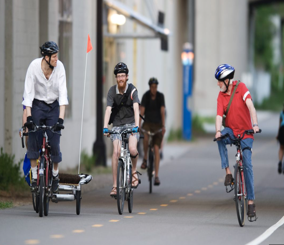

In [17]:
raw_image = Image.open('OD_test.png')
raw_image.resize((284, 245))

In [18]:
# This will convert the raw output to a readable output
from helper import summarize_predictions_natural_language

text = summarize_predictions_natural_language(pipeline_output)
text

'In this image, there are six bicycles two backpacks five persons and one handbag.'

## Generate Audio Narration of this Image

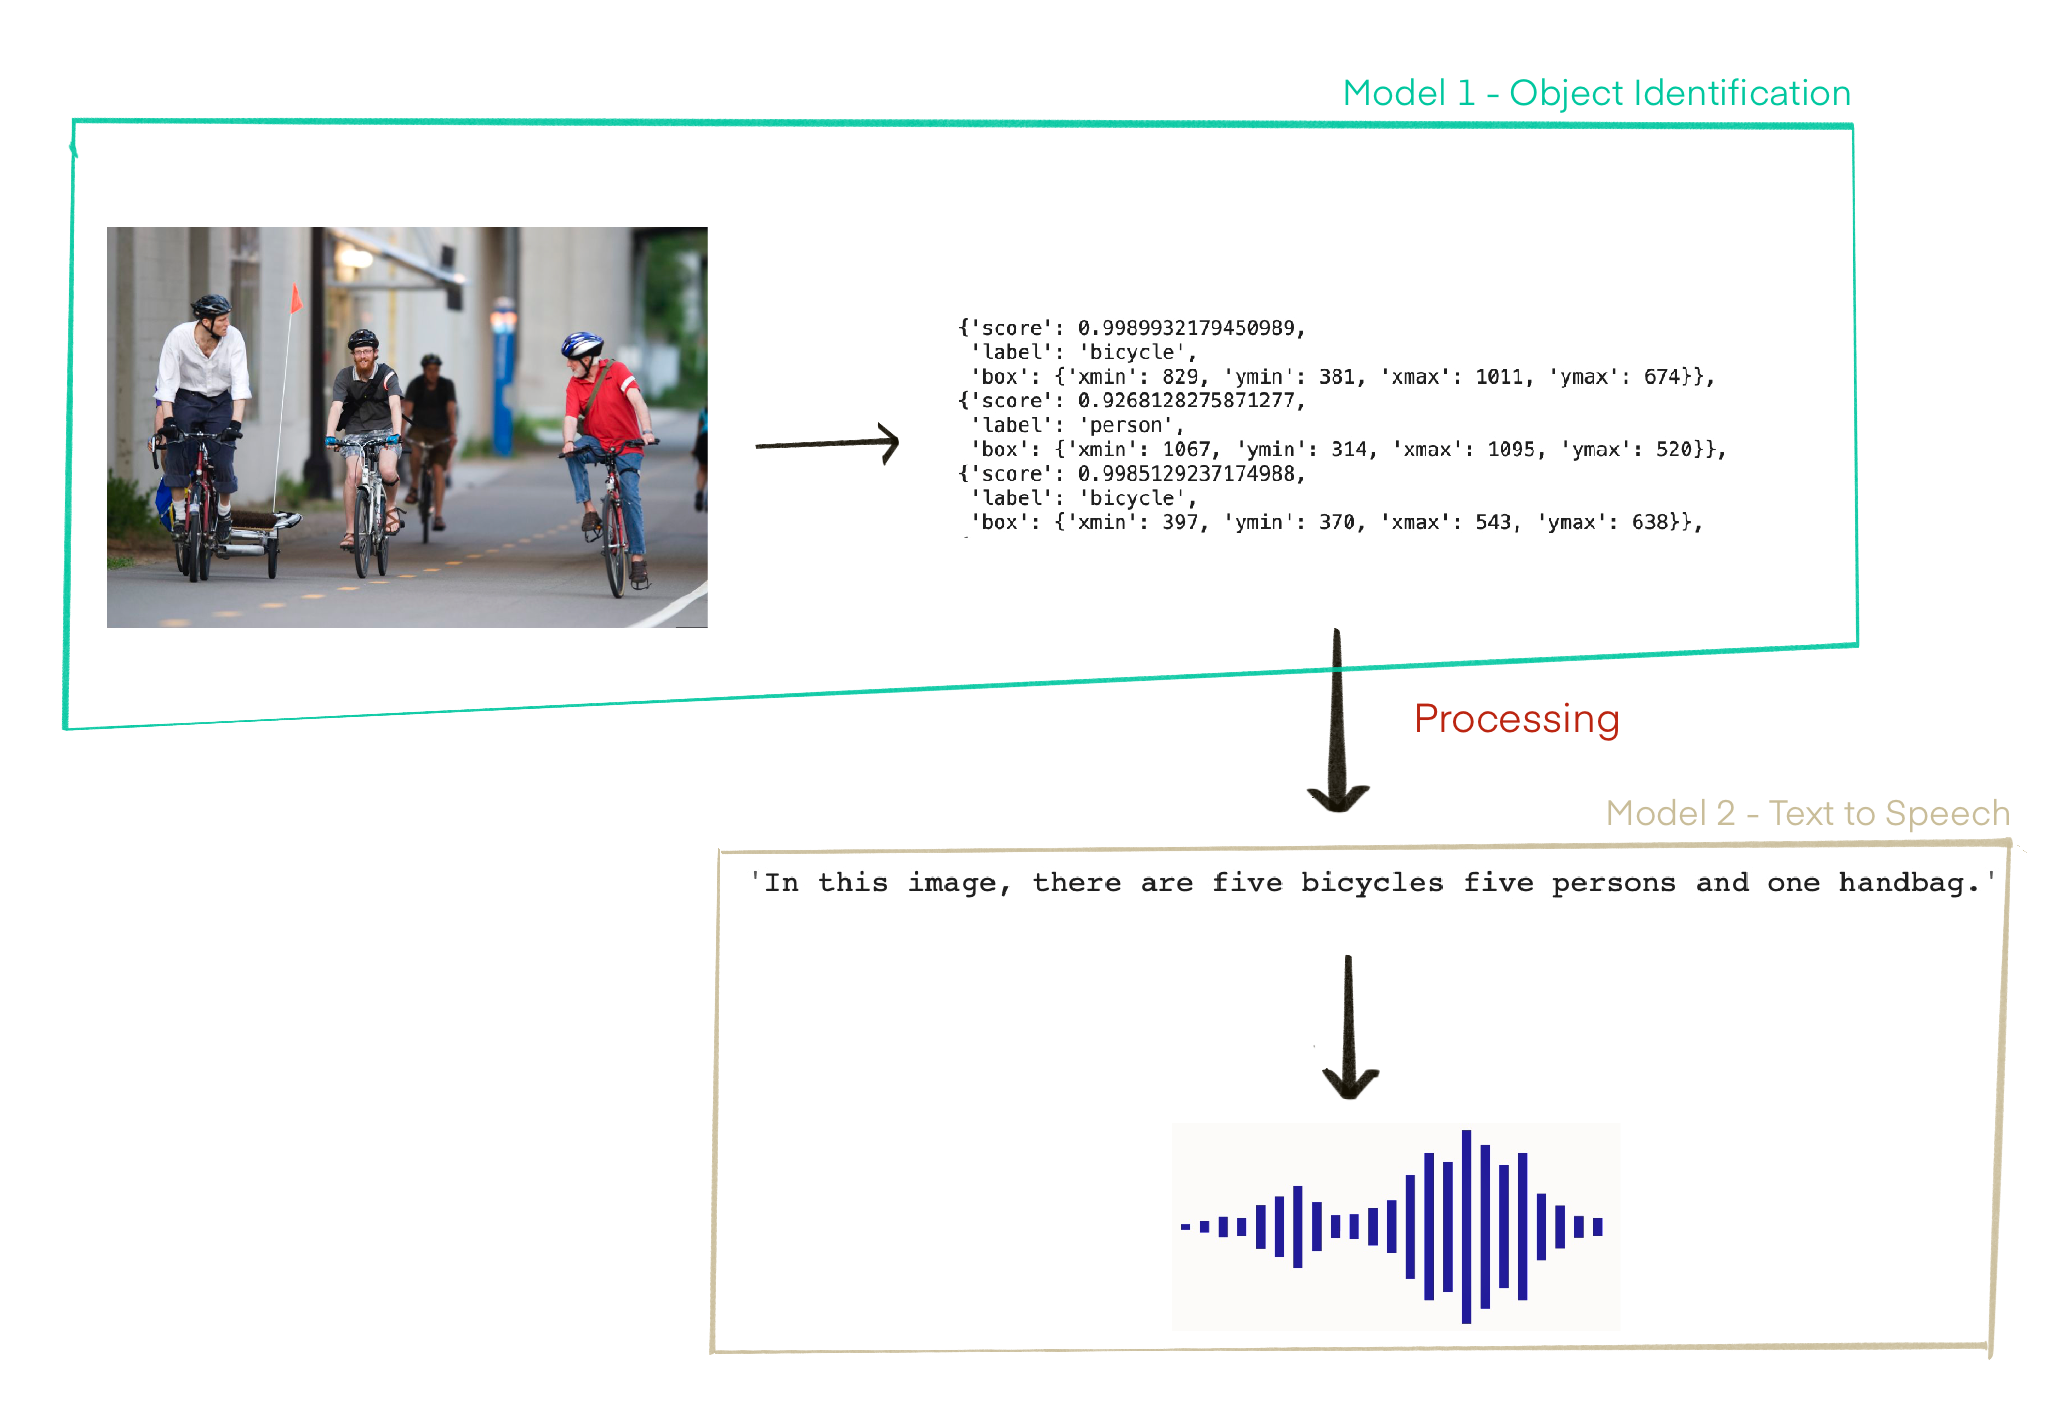

In [19]:
# Pipeline design
from IPython.display import Image
Image(filename='pipeline.PNG')

In [20]:
# Text to Speech model
tts_pipe = pipeline("text-to-speech", model="kakao-enterprise/vits-ljs")

config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.14k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

More info about [kakao-enterprise/vits-ljs](https://huggingface.co/kakao-enterprise/vits-ljs).

In [24]:
narrated_text = tts_pipe(text)

### Play the Generated Audio

In [25]:
from IPython.display import Audio as IPythonAudio

In [26]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])

### Try it yourself!
- Try these models with other images!